# Lab 02. Feature selection and GridSearch


In this lab we will tackle two types of tasks: feature selection and hyperparameter tuning.

Lectures and seminars you might find useful:
- Lectures 1 - 4
- Seminars 2 and 3


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit
- Name your file according to this convention: `2022_lab02_GroupNumber_Surname_Name.ipynb`, for example 
    - `2022_lab02_404_Sheipak_Sviat.ipynb`
    - `2022_lab02_NoGroup_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2022_lab02_GroupNumber_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is ` 2022-10-20 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://disk.yandex.ru/d/vHEio0TmfAMmZg

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1. Feature Selection [4 points]

In this part of the assignemt you will be offered a task to analyze a dataset and figure out which features are the most important. The first means to solve this problem is to use linear model and examine the weights, another option is to train a logic classifier and see which featires it uses to build the splits. And finally you may use PCA and analyze how new PCA-features are configured.

Firstly, load the data from `feature_selection_sample.txt` and save it into variable `db`.

In [3]:
input_filename=r'C:\Users\Sharlotte\Desktop\ml\feature_selection_sample.txt'
db = pd.read_csv(input_filename, sep='\t', header=None)

Feature columns are `[0-9]` and the target is `[10]`. Split the table into object and target arrays:

In [4]:
Y = np.array(db[10])
X = np.array(db[0])
for i in range (1, 9):
    X = np.column_stack([X, np.array(db[i])])

Now split the data into train and test

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
RANDOM_SEED = 42

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=RANDOM_SEED)

**Task 1.1 [1 point] Linear models**

Import `LinearRegression` and define a problem with default parameters.

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model_lr = LinearRegression()

Train the model and check the quality both on train set and test set. Since we are solving a regression problem, we will use `mean_squared_error` as a quality metric.

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
model_lr.fit(X_train, Y_train)
train_pred = model_lr.predict(X_train)
test_pred = model_lr.predict (X_test)
train_score = mean_squared_error(Y_train, train_pred)
test_score = mean_squared_error(Y_test, test_pred)

print("Linear Regression scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))
original_test_score = test_score 

Linear Regression scores: train: 5.828, test: 6.871


Extract feature-vector from the trained model (see [this page](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)) and bar-plot them.

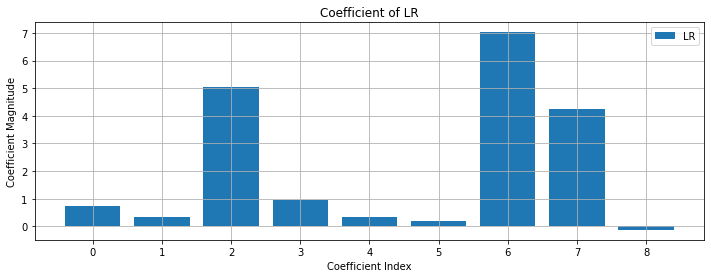

In [12]:
model_coefs = model_lr.coef_

ncoef = model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x, model_coefs, label='LR')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.title('Coefficient of LR')
plt.legend(loc='upper right')
plt.grid()
plt.show()

According to this plot, what are the most important features?

**Your answer here**: The most important features are 2, 3, 6, 7

Save 4 most important feature indexes to a list:

In [13]:
important_feature_idx = [2, 3, 6, 7]

Use these feature indexes to construct new train and test sets with smaller amount of features:

In [14]:
X_train_smaller = X_train[:, important_feature_idx]
X_test_smaller = X_test[:, important_feature_idx]

Define a new `LinearRegression` model, train and test it on new sets: 

In [15]:
smaller_model = LinearRegression()
smaller_model.fit(X_train_smaller, Y_train)
train_pred = smaller_model.predict(X_train_smaller)
test_pred = smaller_model.predict(X_test_smaller)
train_score = mean_squared_error(Y_train, train_pred)
test_score = mean_squared_error(Y_test, test_pred)

print("{} train score: {:.3f}, test score: {:3.3f}".format('Smaller LR', train_score, test_score))

Smaller LR train score: 15.534, test score: 16.172


Compare scores of `model_lr` (variable `original_score`) and `smaller_model` (variable `smaller_test_score`). We reduced number of feature but why scores changes so drastically?

**Your answer here**: Error increased almost 3 times. The data is not scaled and the coefficient of the feature ambiguously indicate its importance, so we could choose not the most important features

**Task 1.2 [1 point] Linear models on scaled data**

It is time to fix this failure and scale the data - we should have done it earlier, since we decided to use linear models. Import the scaler and apply it to all of the data (`X`)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
st_scaler = StandardScaler()
X_scaled = st_scaler.fit_transform(X)

Now we repeat all the steps:
- split the data
- train a model on all features
- plot coefficients
- choose 4 most-important features
- train a model on a feature-subset
- compare the scores
- profit!

In [18]:
X_sc_train, X_sc_test, Y_sc_train, Y_sc_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=RANDOM_SEED)

In [19]:
model_lr_sc = LinearRegression()
model_lr_sc.fit(X_sc_train, Y_sc_train )
train_pred = model_lr_sc.predict(X_sc_train)
test_pred = model_lr_sc.predict(X_sc_test)
train_score = mean_squared_error(Y_sc_train, train_pred)
test_score = mean_squared_error(Y_sc_test, test_pred)
print("Linear Regression on Scaled Data scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))

Linear Regression on Scaled Data scores: train: 5.828, test: 6.871


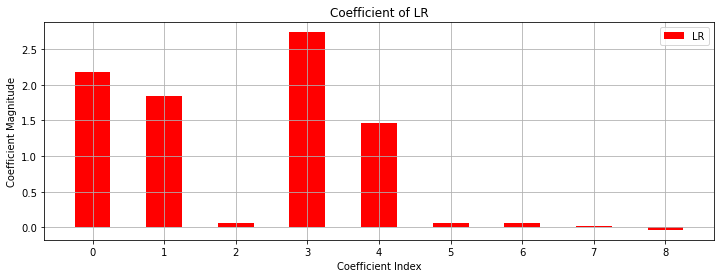

In [20]:
model_coefs = model_lr_sc.coef_
model_name='LR'

ncoef = model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x, model_coefs, label=model_name, width=0.5, color = 'red')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.title ('Coefficient of LR')
plt.grid()
plt.show()

What are the most important features now? Let's do the sanity check and train on this subset:

Now the most important features are 0, 1, 3, 4

In [21]:
important_feature_idx = [0, 1, 3, 4] 

In [22]:
X_sc_train_smaller = X_sc_train[:, important_feature_idx]
X_sc_test_smaller = X_sc_test[:, important_feature_idx]

In [23]:
model_lr_sc_smaller = LinearRegression()
model_lr_sc_smaller.fit(X_sc_train_smaller,Y_sc_train )
train_pred = model_lr_sc_smaller.predict(X_sc_train_smaller)
test_pred = model_lr_sc_smaller.predict(X_sc_test_smaller)
train_score = mean_squared_error(Y_sc_train, train_pred)
test_score = mean_squared_error(Y_sc_test, test_pred)
print("Linear Regression on Scaled Data scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))

Linear Regression on Scaled Data scores: train: 5.841, test: 6.856


Has **MSE** changed? To what extent?

**Your answer here**: MSE changed by hundredths of a percent, a little.

**Task 2 [2 points] Decision Tree**

As you probably now, there are models that are not influence by the fact that data is not normalized: for example, Decision Tree or Random Forest.

Since you already have all the sets prepared: `X_train` and `X_sc_train`, train a RF model and prove that scaling does not affect feature importances.

Then compare durations of training loops for a set with 10 features and 4 features.

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf = RandomForestRegressor()
rf_scaled = RandomForestRegressor()

In [26]:
rf.fit(X_train, Y_train)
rf_scaled.fit(X_sc_train, Y_sc_train)
rf_test_score = rf.score(X_test, Y_test)
rf_scaled_test_score = rf_scaled.score(X_sc_test, Y_sc_test)
print("RF test score {:.3f}".format(rf_test_score))
print("RF scaled test score {:.3f}".format(rf_scaled_test_score))

RF test score 0.879
RF scaled test score 0.892


Look up an attribute for feature importances [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest#sklearn.ensemble.RandomForestRegressor)

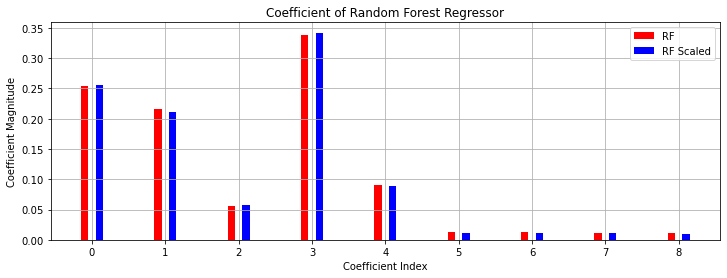

In [27]:
rf_model_coefs = rf.feature_importances_
rf_scaled_model_coefs = rf_scaled.feature_importances_
ncoef = rf_model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x - 0.1, rf_model_coefs, label="RF", width=0.1, color = 'red')
plt.bar(default_x + 0.1, rf_scaled_model_coefs, label="RF Scaled", width=0.1, color = 'blue')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.title ('Coefficient of Random Forest Regressor')
plt.grid()
plt.show()

**Your Comment on the plot:** So we can see that feature importances are equal.

Now examine how reduction of number of features impacts durations of training loops. You may use `time` module.

Here is an example of `time` usage:

In [28]:
from time import time

n = 1000
a = np.diag(np.ones(n)) + np.random.rand(n, n)

start = time()
det = np.linalg.det(a)
end = time()
print("{} x {} matrix determinant took {:.3f} seconds".format(n, n, end - start))

1000 x 1000 matrix determinant took 0.040 seconds


C:\Users\Sharlotte\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [29]:
rf1 = RandomForestRegressor()
rf2 = RandomForestRegressor()

In [30]:
start1 = time()
rf1.fit(X_train, Y_train)

end1 = time()

start2 = time()
rf2.fit(X_train_smaller, Y_train)

end2 = time()

print("The training of model with 10 features tooks {:.3f}, with 4 - {:.3f} seconds".format(end1 - start1, end2 - start2))

The training of model with 10 features tooks 0.496, with 4 - 0.321 seconds


**Your Comment on time consuption**: The time for 4 features is almost one and a half times less than for 10 features.

## Part 2. GridSearch: hyperparameter tuning  [11 points]

In this part we will try to solve a multiclass classification task on Richter's dataset ([source](https://www.kaggle.com/mullerismail/richters-predictor-modeling-earthquake-damage)). The aim is to predict damage rate (label from 1 to 3).

We will experiment with following models:
- kNN
- LinearRegression
- DecisionTree
- RandomForest

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read the data, transform the table into arrays `X` and `y`, target column is called *damage_grade*. Note that objects are described with both numerical and categorical features. In the first part of this assignment we will use numerical features only (apply `_get_numeric_data()` to `pandas` dataframe).

Split the data into `train`, `test` and `val` with ratio 4-to-2-to-1. Since we are going to use metric classifiers, don't forget to preprocess the data.

In [63]:
RANDOM_SEED = 42

In [64]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [65]:
data = pd.read_csv((r"C:\Users\Sharlotte\Desktop\ml\richters_sample.csv"))
objects = data.drop(columns="damage_grade")
labels = data["damage_grade"]

In [66]:
def _get_numeric_data(self):
     return self._constructor(
         self._data.get_numeric_data()).__finalize__(self)
X = _get_numeric_data(objects)
y = labels
assert X.shape == (35000, 31) and  y.shape == (35000,)

_get_numeric_data: https://github.com/pandas-dev/pandas/blob/870b6a6d6415c76d051b287adcb180ac3020b6e8/pandas/core/generic.py#L3538

In [67]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [68]:
X_train, X_not_train, y_train, y_not_train = train_test_split(X, y, test_size= 0.42855, 
                                                    shuffle=True, stratify= y,
                                                    random_state=RANDOM_SEED)

X_test, X_val, y_test, y_val = train_test_split(X_not_train, y_not_train, test_size= 0.3333, 
                                                    shuffle=True, stratify= y_not_train,
                                                    random_state=RANDOM_SEED)

assert X_train.shape[0] == 20000 and X_test.shape[0] == 10000 and X_val.shape[0] == 5000

Import the models:

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Import classification quality metrics:

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

**Task 2.1 [2 points]. Default-parameter models**

Let's take 4 classifiers (1 of a kind) with **default** parameters and check how well they can perform.

In [71]:
clf1 = KNeighborsClassifier()
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier()

default_classifiers = [clf1, clf2, clf3, clf4]

Fit each classifier on `X_train, y_train`, predict on `X_test`

In [72]:
clf_predictions = []
for clf in default_classifiers:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    clf_predictions.append(pred)

Apply 5 metrics to each prediction:

In [73]:
accuracies = [accuracy_score(y_test, pred) for pred in clf_predictions]
precisions = [precision_score(y_test, pred, zero_division=1) for pred in clf_predictions] 
micro_recalls = [recall_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 
macro_precisions = [precision_score(y_test, pred, average="macro", zero_division=1) for pred in clf_predictions] 
macro_recalls = [recall_score(y_test, pred, average="macro", zero_division=1) for pred in clf_predictions]

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls"]

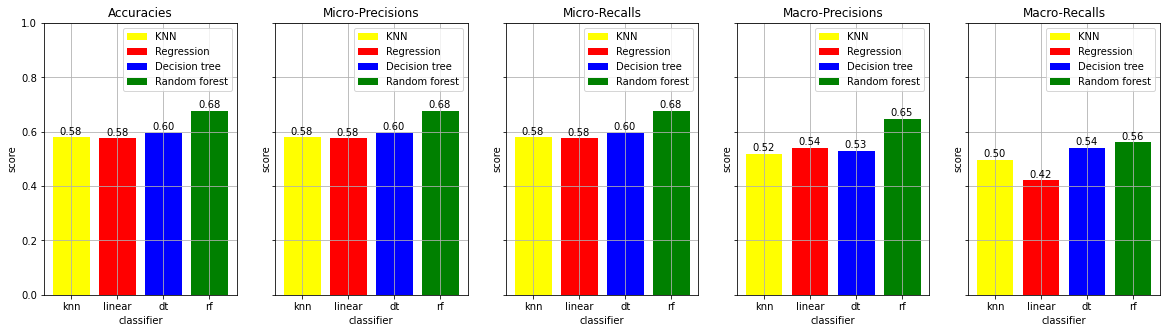

In [74]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["knn", "linear", "dt", "rf"]
colors = ["yellow", "red", "blue", "green"]
xticks = 1 + np.arange(len(xlabels))
col = ["KNN", "Regression", "Decision tree", "Random forest"]

for ax, score, name in zip(axs, scores, names):
    for i, v in enumerate(score):
        ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
        ax.bar(xticks[i], score[i], color=colors[i], label=col[i])
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_title(name)
    ax.set_xlabel('classifier')
    ax.set_ylabel('score')
    ax.legend()
    ax.grid()
    
plt.show()

Choose the model with the biggest gap between micro-precision and macro-precision and plot its confusion matrix.
For confusion matrix do `from sklearn.metrics import confusion_matrix` (don't forget to put valid labels on plots).

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [77]:
weakest_model_index = 2

dt_preds = clf_predictions[weakest_model_index]
conf_matrix = confusion_matrix(y_test, dt_preds)

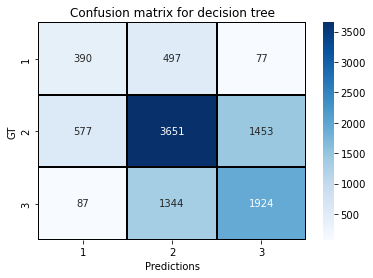

In [78]:
plot_labels = sorted(labels.unique())

sns.heatmap(conf_matrix, 
            cmap="Blues",
            xticklabels=plot_labels,
            yticklabels=plot_labels,
            linewidths=0.01, linecolor="black", 
            annot = True, fmt='2g')

plt.ylabel("GT")
plt.title('Confusion matrix for decision tree')
plt.xlabel("Predictions")
plt.show()

Going by confusion matrix, which class is the hardest to predict? How does it affect macro/micro-precision?

**Your answer:**  The first class. The percent of true prediction in first class is 40. macro/micro-precision depend on TP and FP. The less TP (cell (1, 1)), the less macro/micro-precision and the more FP(cell (1, 2), cell (1, 3) the less macro/micro-precision. Because TP is in the numerator, FP is only in the denominator of macro/micro-precision

**Task 2.2 [3 points]. 1-D Grid Search**

No wonder that default models have scores far from perfect. Let's tweak those hyperparameters with GridSearch: we will iteratively look through all combinations of parameters in the grid and choose the best. At each iteraction use cross validation score with number of folds `k=5`.

Firstly, build the grid for kNN. It will be a 1-D grid with the only parameter `n_neighbors`. Look through all values from 1 to 50.

*Hint*: `np.arange`, `np.linspace` and `np.logspace` are very useful for grid constructions.

**Attention** this part of assignment may need a lot of computational powers (as you probably remember, training of knn is quite expensive). 

To save some resources while doing grid search for knn you may use the trick from Part1: do feature-selection with DTree/RandomForest and select top-5 or top-10 features.

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [78]:
knn_clf = KNeighborsClassifier()
knn_grid = {
    "n_neighbors": np.arange(1, 50)
}

In [79]:
knn_grid_searcher = GridSearchCV(knn_clf,  knn_grid, cv=5, return_train_score=True)
knn_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             return_train_score=True)

Plot mean cross-validation score for each hyperparameter:
- X-axis is hyperparameter values
- Y-axis is mean CV-score

To show variance of obtained estimatets add *mean + 3 stds* and *mean - 3 stds* to the plot. You may use `plt.fill_between` to make it more descriptive (it will look like a coridor around the mean).

To get values we need to plot search in `knn_grid_searcher` parameters and attributes.

In [84]:
means = np.array(knn_grid_searcher.cv_results_['mean_test_score'])
stds = np.array(knn_grid_searcher.cv_results_['std_test_score'])

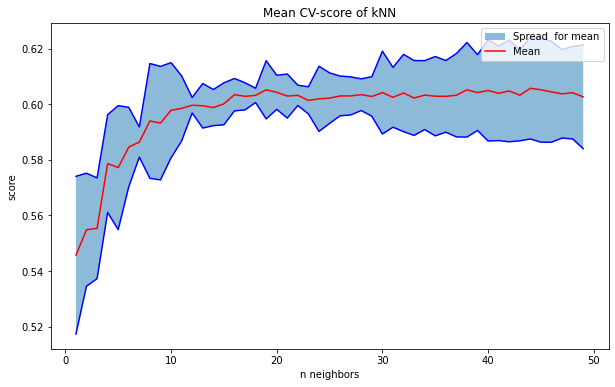

In [85]:
import matplotlib.lines as mlines
plt.figure(figsize=(10, 6))
xs = knn_grid_searcher.param_grid["n_neighbors"]
plt.plot(xs, means, 'r', xs, means - 3*stds, 'b', xs, means + 3*stds,'b')
h=plt.fill_between(xs, means - 3*stds, means + 3*stds, alpha=0.5)
reds_line = mlines.Line2D(xs, means, color='red')
plt.legend(handles=[h, reds_line], labels=['Spread  for mean', 'Mean'], loc='upper right')
plt.title ('Mean CV-score of kNN')
plt.xlabel('n neighbors')
plt.ylabel('score')
plt.show()

Print the best estimator and its score:

In [86]:
print ('The best estimator: ', knn_grid_searcher.best_estimator_)
print ('The score of the best estimator: ', knn_grid_searcher.best_score_)

The best estimator:  KNeighborsClassifier(n_neighbors=44)
The score of the best estimator:  0.60575


Now do the same for 3 other models:
- Decision Tree: grid search the `max_depth` parameter
- LogisticRegression: `penalty`
- RandomForest: `n_estimators`

Some of the hyperparameters are not numeric, but categorical (like `penalty`) and you should choose some other way to plot cv-scores instead of `plt.plot`

In [87]:
clf = DecisionTreeClassifier()
grid = {
   'max_depth' : np.arange(1, 50)
}

In [88]:
grid_searcher=GridSearchCV(clf, grid, cv=5, return_train_score=True)
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             return_train_score=True)

In [89]:
means = np.array(grid_searcher.cv_results_['mean_test_score'])
stds = np.array(grid_searcher.cv_results_['std_test_score'])

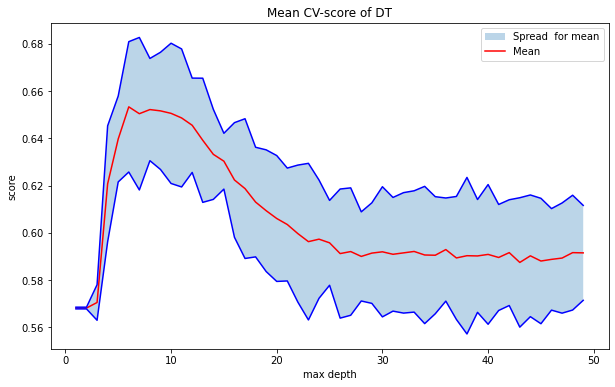

In [90]:
plt.figure(figsize=(10, 6))
xs = grid_searcher.param_grid['max_depth']
plt.plot(xs, means, 'r', xs, means - 3*stds, 'b', xs, means + 3*stds,'b')
h=plt.fill_between(xs, means - 3*stds, means + 3*stds, alpha=0.3)
reds_line = mlines.Line2D(xs, means, color='red')
plt.legend(handles=[h, reds_line], labels=['Spread  for mean', 'Mean'], loc='upper right')
plt.title ('Mean CV-score of DT')
plt.xlabel('max depth')
plt.ylabel('score')
plt.show()

In [91]:
print ('The best estimator: ', grid_searcher.best_estimator_)
print ('The score of the best estimator: ', grid_searcher.best_score_)

The best estimator:  DecisionTreeClassifier(max_depth=6)
The score of the best estimator:  0.6533


In [92]:
clf = LogisticRegression(solver='saga', l1_ratio=0.5, max_iter=400)
grid = {
   'penalty' : np.array(['l1', 'l2', 'none', 'elasticnet'])   
}
import warnings
warnings.filterwarnings("ignore")

In [93]:
grid_searcher=GridSearchCV(clf, grid, cv=5, return_train_score=True)
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(l1_ratio=0.5, max_iter=400,
                                          solver='saga'),
             param_grid={'penalty': array(['l1', 'l2', 'none', 'elasticnet'], dtype='<U10')},
             return_train_score=True)

In [94]:
means = np.array(grid_searcher.cv_results_['mean_test_score'])
stds = np.array(grid_searcher.cv_results_['std_test_score'])

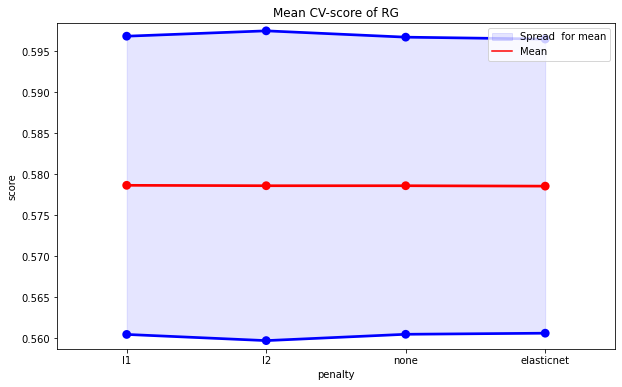

In [95]:
plt.figure(figsize=(10, 6))
plt.ylim(np.min(means - 3*stds)-0.001, np.max(means + 3*stds)+0.001)
h=plt.fill_between(grid['penalty'], means - 3*stds, means + 3*stds, color='b', alpha=0.1)
sns.pointplot(x=grid['penalty'], y=means, color='r')
sns.pointplot(x=grid['penalty'], y=means - 3*stds, color="b")
sns.pointplot(x=grid['penalty'], y=means + 3*stds, color="b")
reds_line = mlines.Line2D(grid['penalty'], means, color='red')
plt.legend(handles=[h, reds_line], labels=['Spread  for mean', 'Mean'], loc='upper right')
plt.xlabel ('penalty')
plt.ylabel ('score')
plt.title ('Mean CV-score of RG')
plt.show()

In [96]:
print ('The best estimator: ', grid_searcher.best_estimator_)
print ('The score of the best estimator: ', grid_searcher.best_score_)

The best estimator:  LogisticRegression(l1_ratio=0.5, max_iter=400, penalty='l1', solver='saga')
The score of the best estimator:  0.57865


In [97]:
clf = RandomForestClassifier()
grid = {
   'n_estimators' : np.arange(1, 200)
}

In [98]:
grid_searcher=GridSearchCV(clf, grid, cv=5, return_train_score=True)
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91...
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 1

In [99]:
means = np.array(grid_searcher.cv_results_['mean_test_score'])
stds = np.array(grid_searcher.cv_results_['std_test_score'])

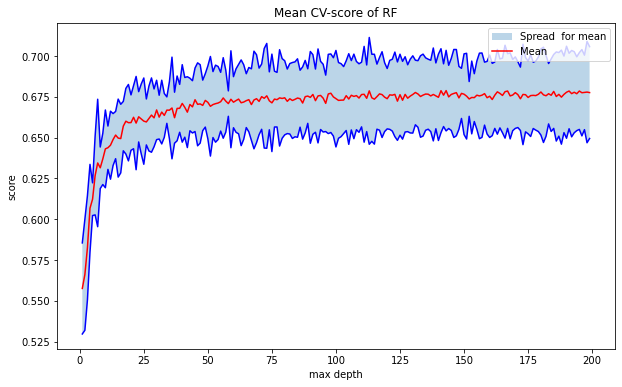

In [100]:
xs = grid_searcher.param_grid['n_estimators']
plt.figure(figsize=(10, 6))
plt.plot(xs, means, 'r', xs, means - 3*stds, 'b', xs, means + 3*stds,'b')
h=plt.fill_between(xs, means - 3*stds, means + 3*stds, alpha=0.3)
reds_line = mlines.Line2D(xs, means, color='red')
plt.legend(handles=[h, reds_line], labels=['Spread  for mean', 'Mean'], loc='upper right')
plt.title ('Mean CV-score of RF')
plt.xlabel('max depth')
plt.ylabel('score')
plt.show()

In [101]:
print ('The best estimator: ', grid_searcher.best_estimator_)
print ('The score of the best estimator: ', grid_searcher.best_score_)

The best estimator:  RandomForestClassifier(n_estimators=143)
The score of the best estimator:  0.6788500000000001


**Task 2.3 [3 points] 2-D Grid Search**

Now it's time to improve the models with a 2-D grid search. For each classifier we will look for an optimal **pair** of hyperparameters. However, going through the whole grid may be computationally expensive, so here are some ways to speed it up:

1. Make sparse grids with fewer number of parameters
2. Choose random subsample from grid points and look for the optimum there
3. Reduce number of folds in cross-validation
4. Make a greedy grid search (use two grid-searchers sequentially)

You have 4 models, 4 methods how to make grid search faster, choose one method per model and try it out.
Report whether you got boost in quality.

Here are default 2-D grids:
- kNN:
    - n_neighbors from 1 to 50
    - metric: `euclidean`, `manhattan` or `chebyshev`
    
- linear
    - penalty `l1`, `l2`, `elasticnet`, `none`
    - C from 0.001 to 1000
    
- dtree:
    - max_depth from 1 to 50
    - criterion `gini` or `entropy`

- rf
    - n_estimators from 1 to 200
    - max_features from 1 to 30

In [102]:
# Greed
clf = KNeighborsClassifier()
grid = {
   'n_neighbors' : np.arange(1, 50)
}
grid_searcher=GridSearchCV(clf, grid, cv=5, return_train_score=True)
grid_searcher.fit(X_train, y_train)
clf=grid_searcher.best_estimator_
grid = {
   'metric' : np.array(['euclidean', 'manhattan', 'chebyshev'])
}
grid_searcher=GridSearchCV(clf, grid, cv=5, return_train_score=True)
grid_searcher.fit(X_train, y_train)
print ('The best estimator: ', grid_searcher.best_estimator_)
print ('The score of the best estimator: ', grid_searcher.best_score_)

The best estimator:  KNeighborsClassifier(metric='manhattan', n_neighbors=44)
The score of the best estimator:  0.61895


In [103]:
# Recude number  of fold
clf = DecisionTreeClassifier()
grid = {
   'max_depth' : np.arange(1, 50), 
   'criterion' : np.array(['gini', 'entropy'])
}
grid_searcher=GridSearchCV(clf, grid, cv=3, return_train_score=True)
grid_searcher.fit(X_train, y_train)
print ('The best estimator: ', grid_searcher.best_estimator_)
print ('The score of the best estimator: ', grid_searcher.best_score_)

The best estimator:  DecisionTreeClassifier(max_depth=6)
The score of the best estimator:  0.6525502707762901


In [104]:
# Sparse grids
clf = LogisticRegression(solver='saga', l1_ratio=0.8, max_iter=200)
grid = {
   'penalty' : np.array(['l1', 'l2', 'none', 'elasticnet']),
    'C' : np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
}

grid_searcher=GridSearchCV(clf, grid, cv=5, return_train_score=True)
grid_searcher.fit(X_train, y_train)
print ('The best estimator: ', grid_searcher.best_params_)
print ('The score of the best estimator: ', grid_searcher.best_score_)

The best estimator:  {'C': 0.1, 'penalty': 'elasticnet'}
The score of the best estimator:  0.5791000000000001


In [105]:
grid = {
   'penalty' : np.array(['l1', 'l2', 'none', 'elasticnet']),
    'C' : np.arange(0.05, 0.51, 0.01)
}

grid_searcher=GridSearchCV(clf, grid, cv=5, return_train_score=True)
grid_searcher.fit(X_train, y_train)
print ('The best estimator: ', grid_searcher.best_estimator_)
print ('The score of the best estimator: ', grid_searcher.best_score_)

The best estimator:  LogisticRegression(C=0.28, l1_ratio=0.8, max_iter=200, penalty='elasticnet',
                   solver='saga')
The score of the best estimator:  0.5791999999999999


In [108]:
# Subset
import random

clf = RandomForestClassifier()
n=np.arange (1, 200)
random.shuffle(n)
max_=np.arange (1, 30)
random.shuffle(max_)
grid = {
   'n_estimators' : n[0:25],
   'max_features' : max_[0:8]
}
grid_searcher=GridSearchCV(clf, grid, cv=5, return_train_score=True, n_jobs=-1)
grid_searcher.fit(X_train, y_train)
print ('The best estimator: ', grid_searcher.best_estimator_)
print ('The score of the best estimator: ', grid_searcher.best_score_)

The best estimator:  RandomForestClassifier(max_features=17, n_estimators=172)
The score of the best estimator:  0.6869500000000002


I got significant boost in quality for kNN and RF: more than hundredth

**Task 2.4 [1 point] Categorical features**

Add categorical features and examine how the influence performance of each model. Preprocess the data before applying a model: we need to encode categorical features with one-hot encoding (`get_dummies` from `pandas` or `OneHotEncoder` from `sklearn`).

Don't forget to repeat the train-test-val splits.

In [48]:
objects_with_dummies = pd.get_dummies(objects)

X = objects_with_dummies
y = labels
assert X.shape == (35000, 69) and  y.shape == (35000,)

What was your best model before adding categorical features?

Use GridSearch + 5-fold CV on **train set** to define your new best model.

In [49]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_not_train, y_train, y_not_train = train_test_split(X, y, test_size= 0.42855, 
                                                    shuffle=True, stratify=y,
                                                    random_state=RANDOM_SEED)
X_test, X_val, y_test, y_val = train_test_split(X_not_train, y_not_train, test_size= 0.3333, 
                                                    shuffle=True, stratify= y_not_train,
                                                    random_state=RANDOM_SEED)

In [50]:
clf = DecisionTreeClassifier()
grid = {
   'max_depth' : np.arange(1, 50)
}
grid_searcher=GridSearchCV(clf, grid, cv=5, return_train_score=True, n_jobs=-1)
grid_searcher.fit(X_train, y_train)
print ('The best estimator: ', grid_searcher.best_estimator_)
print ('The score of the best estimator: ', grid_searcher.best_score_)

The best estimator:  DecisionTreeClassifier(max_depth=9)
The score of the best estimator:  0.6547000000000001


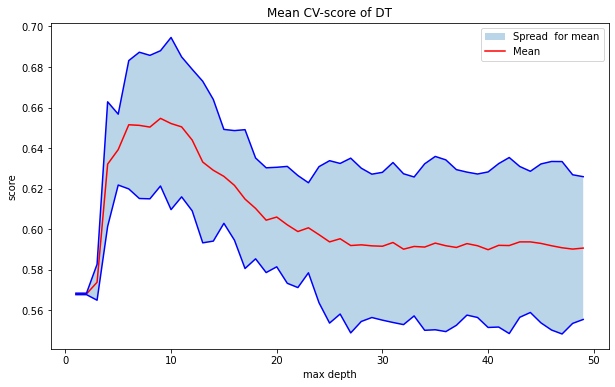

In [52]:
import matplotlib.lines as mlines
means = np.array(grid_searcher.cv_results_['mean_test_score'])
stds = np.array(grid_searcher.cv_results_['std_test_score'])
plt.figure(figsize=(10, 6))
xs = grid_searcher.param_grid['max_depth']
plt.plot(xs, means, 'r', xs, means - 3*stds, 'b', xs, means + 3*stds,'b')
h=plt.fill_between(xs, means - 3*stds, means + 3*stds, alpha=0.3)
reds_line = mlines.Line2D(xs, means, color='red')
plt.legend(handles=[h, reds_line], labels=['Spread  for mean', 'Mean'], loc='upper right')
plt.title ('Mean CV-score of DT')
plt.xlabel('max depth')
plt.ylabel('score')
plt.show()

In [53]:
clf=grid_searcher.best_estimator_.fit (X_train, y_train)
ind=np.argsort(clf.feature_importances_)[::-1]
ind=ind[0:20]
X_new=X_train[:, ind]

In [54]:
knn_clf = KNeighborsClassifier()
knn_grid = {
    "n_neighbors": np.arange(1, 50)
}
knn_grid_searcher = GridSearchCV(knn_clf,  knn_grid, cv=5, return_train_score=True)
knn_grid_searcher.fit(X_new, y_train)
print ('The best estimator: ', knn_grid_searcher.best_estimator_)
print ('The score of the best estimator: ', knn_grid_searcher.best_score_)

The best estimator:  KNeighborsClassifier(n_neighbors=28)
The score of the best estimator:  0.59785


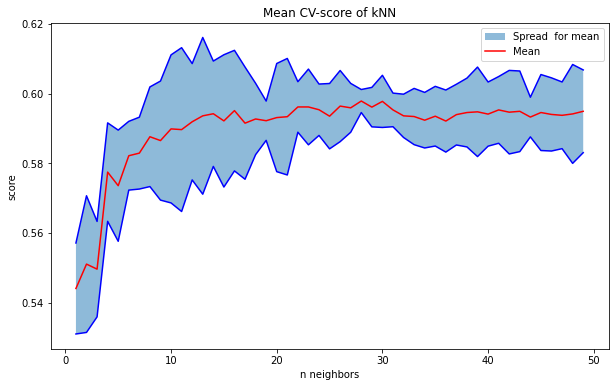

In [55]:
means = np.array(knn_grid_searcher.cv_results_['mean_test_score'])
stds = np.array(knn_grid_searcher.cv_results_['std_test_score'])

plt.figure(figsize=(10, 6))
xs = knn_grid_searcher.param_grid["n_neighbors"]
plt.plot(xs, means, 'r', xs, means - 3*stds, 'b', xs, means + 3*stds,'b')
h=plt.fill_between(xs, means - 3*stds, means + 3*stds, alpha=0.5)
reds_line = mlines.Line2D(xs, means, color='red')
plt.legend(handles=[h, reds_line], labels=['Spread  for mean', 'Mean'], loc='upper right')
plt.title ('Mean CV-score of kNN')
plt.xlabel('n neighbors')
plt.ylabel('score')
plt.show()

In [61]:
clf = LogisticRegression(solver='saga', l1_ratio=0.5)
grid = {
   'penalty' : np.array(['l1', 'l2', 'none', 'elasticnet'])
}
import warnings
warnings.filterwarnings("ignore")
grid_searcher=GridSearchCV(clf, grid, cv=5, return_train_score=True, n_jobs=-1)
grid_searcher.fit(X_train, y_train)
print ('The best estimator: ', grid_searcher.best_estimator_)
print ('The score of the best estimator: ', grid_searcher.best_score_)

The best estimator:  LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')
The score of the best estimator:  0.5916


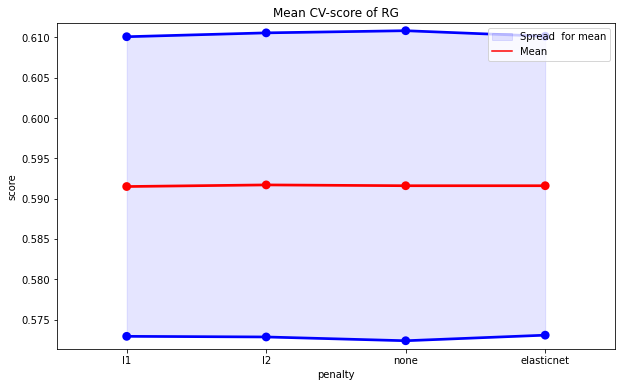

In [57]:
means = np.array(grid_searcher.cv_results_['mean_test_score'])
stds = np.array(grid_searcher.cv_results_['std_test_score'])

plt.figure(figsize=(10, 6))
plt.ylim(np.min(means - 3*stds)-0.001, np.max(means + 3*stds)+0.001)
h=plt.fill_between(grid['penalty'], means - 3*stds, means + 3*stds, color='b', alpha=0.1)
sns.pointplot(x=grid['penalty'], y=means, color='r')
sns.pointplot(x=grid['penalty'], y=means - 3*stds, color="b")
sns.pointplot(x=grid['penalty'], y=means + 3*stds, color="b")
reds_line = mlines.Line2D(grid['penalty'], means, color='red')
plt.legend(handles=[h, reds_line], labels=['Spread  for mean', 'Mean'], loc='upper right')
plt.xlabel ('penalty')
plt.ylabel ('score')
plt.title ('Mean CV-score of RG')
plt.show()

In [58]:
clf = RandomForestClassifier()
grid = {
   'n_estimators' : np.arange(1, 200)
}
grid_searcher=GridSearchCV(clf, grid, cv=5, return_train_score=True, n_jobs=-1)
grid_searcher.fit(X_new, y_train)
print ('The best estimator: ', grid_searcher.best_estimator_)
print ('The score of the best estimator: ', grid_searcher.best_score_)

The best estimator:  RandomForestClassifier(n_estimators=154)
The score of the best estimator:  0.6816500000000001


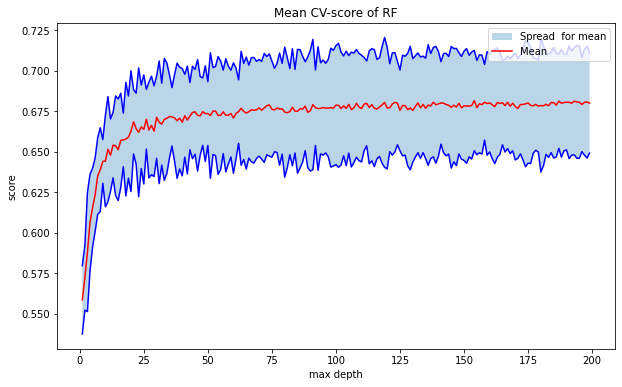

In [59]:
means = np.array(grid_searcher.cv_results_['mean_test_score'])
stds = np.array(grid_searcher.cv_results_['std_test_score'])

xs = grid_searcher.param_grid['n_estimators']
plt.figure(figsize=(10, 6))
plt.plot(xs, means, 'r', xs, means - 3*stds, 'b', xs, means + 3*stds,'b')
h=plt.fill_between(xs, means - 3*stds, means + 3*stds, alpha=0.3)
reds_line = mlines.Line2D(xs, means, color='red')
plt.legend(handles=[h, reds_line], labels=['Spread  for mean', 'Mean'], loc='upper right')
plt.title ('Mean CV-score of RF')
plt.xlabel('max depth')
plt.ylabel('score')
plt.show()

Performance of which model increased the most? Why?

**Your answer here**: With respect to previous task the score of DT increased by 0.002, of RF - by 0.005, of LG - by 0.013. Score of kNN decrease by 0.021. It's logical, because from theory we know that LG handle categorical features well.

**Task 2.5 [2 point] Blending**

Since you have already trained and tuned a lot of models, it might be useful to **blend** two best classifiers to get one even better.

Pick two best models, say, `clf_a` and `clf_b`, train them on the `train_set`.

Then use `Voting classifier` to build 
$$
clf_c(\alpha) = \alpha \cdot clf_a + (1 - \alpha) \cdot clf_b
$$
You will have to tune $\alpha$ using grid search on `test_set` and then make final quality assessment on `val_set`.

In [60]:
from sklearn.ensemble import VotingClassifier

clf1=RandomForestClassifier(n_estimators=187)
clf1.fit (X_train, y_train)
clf2=DecisionTreeClassifier(max_depth=9)
clf2.fit (X_train, y_train)

w=[]
alpha= np.arange (0, 1, 0.01)
for i in range(len(alpha)):
    w.append([alpha[i], 1-alpha[i]])

clf = VotingClassifier(estimators=[('1', clf1), ('2', clf2)], voting='soft')
grid = {
    'weights': w
}

grid_searcher = GridSearchCV(clf, grid, cv=5)
grid_searcher.fit(X_test, y_test)
print('Score of voting classifier: ', grid_searcher.best_estimator_)
print('Score of voting classifier: ', grid_searcher.score(X_val, y_val))

Score of voting classifier:  VotingClassifier(estimators=[('1', RandomForestClassifier(n_estimators=187)),
                             ('2', DecisionTreeClassifier(max_depth=9))],
                 voting='soft', weights=[0.79, 0.20999999999999996])
Score of voting classifier:  0.6738


What was the best pair of models to blend? Did blending help to increase quality of each classifier?

**Your answer here**: I blend the random forest and the decision Tree. Blending help to increase quality of the decision tree, but not random forest